In [69]:
import seaborn as sns
import numpy as np
import pandas as pd

In [72]:
df = pd.read_csv('gait2.csv')

In [73]:
df

,ac_x,ac_y,ac_z,gy_x,gy_y,gy_z,label
0,-1.604164,0.895459,10.565935,0.224960,0.250687,1.259995,Normal
1,-1.673598,3.076643,6.605804,0.312317,0.170792,0.899933,Normal
2,-0.126897,2.691165,7.405492,0.415649,0.101562,0.521759,Normal
3,0.354353,2.597788,9.371192,0.453995,0.069595,0.159576,Normal
4,0.416604,2.226676,10.247497,0.382614,0.060013,-0.156815,Normal
...,...,...,...,...,...,...,...
53995,4.989816,0.167594,0.454898,-1.271592,2.294563,-0.239001,Abnormal
53996,2.439692,-0.014365,-0.885855,-0.842154,1.776549,0.312610,Abnormal
53997,1.867477,-1.403002,-1.644817,-0.330860,0.702037,0.352317,Abnormal
53998,3.624821,-2.207454,-2.066196,0.295277,-0.283289,0.586889,Abnormal


In [74]:
df.isnull().sum()

ac_x     0
ac_y     0
ac_z     0
gy_x     0
gy_y     0
gy_z     0
label    0
dtype: int64

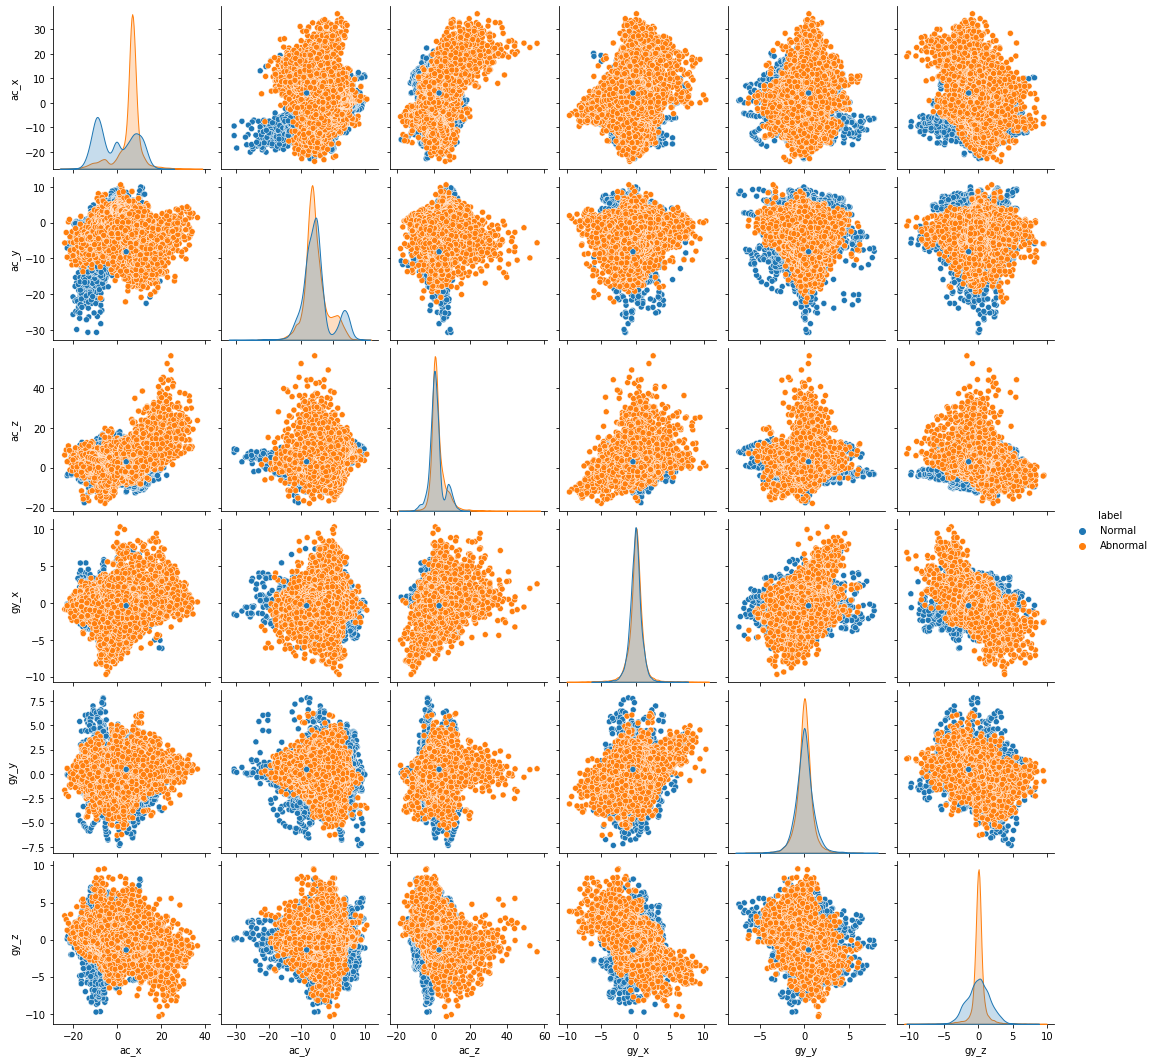

In [49]:
##EDA
sns.pairplot(df,hue='label')

In [50]:
df.corr()

,ac_x,ac_y,ac_z,gy_x,gy_y,gy_z
ac_x,1.000000,-0.155344,0.105187,0.033043,0.010235,-0.054031
ac_y,-0.155344,1.000000,0.365124,0.033550,-0.048196,0.013925
ac_z,0.105187,0.365124,1.000000,0.047800,0.015443,-0.037346
gy_x,0.033043,0.033550,0.047800,1.000000,0.080708,-0.197909
gy_y,0.010235,-0.048196,0.015443,0.080708,1.000000,0.089668
gy_z,-0.054031,0.013925,-0.037346,-0.197909,0.089668,1.000000


In [51]:
## split dataset into indepedent and dependent feaetures
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [52]:
y

0          Normal
1          Normal
2          Normal
3          Normal
4          Normal
           ...   
53995    Abnormal
53996    Abnormal
53997    Abnormal
53998    Abnormal
53999      Normal
Name: label, Length: 54000, dtype: object

In [53]:
#label encoding
y = y.map({'Normal':0,'Abnormal':1})

In [54]:
y

0        0
1        0
2        0
3        0
4        0
        ..
53995    1
53996    1
53997    1
53998    1
53999    0
Name: label, Length: 54000, dtype: int64

In [57]:
X

,ac_x,ac_y,ac_z,gy_x,gy_y,gy_z
0,-1.604164,0.895459,10.565935,0.224960,0.250687,1.259995
1,-1.673598,3.076643,6.605804,0.312317,0.170792,0.899933
2,-0.126897,2.691165,7.405492,0.415649,0.101562,0.521759
3,0.354353,2.597788,9.371192,0.453995,0.069595,0.159576
4,0.416604,2.226676,10.247497,0.382614,0.060013,-0.156815
...,...,...,...,...,...,...
53995,4.989816,0.167594,0.454898,-1.271592,2.294563,-0.239001
53996,2.439692,-0.014365,-0.885855,-0.842154,1.776549,0.312610
53997,1.867477,-1.403002,-1.644817,-0.330860,0.702037,0.352317
53998,3.624821,-2.207454,-2.066196,0.295277,-0.283289,0.586889


In [75]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameter = {'penalty':['l1','l2','elasticnet','None'], 'C':[1,2,3,4,5,6,7,8,9,20,30,40],'max_iter':[100,200,250,300]}

In [79]:
classifier_regressior = GridSearchCV(classifier, param_grid= parameter, scoring='accuracy', cv = 5)

In [80]:
classifier_regressior.fit(X_train,y_train)

C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Shahriar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise V

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 30, 40],
                         'max_iter': [100, 200, 250, 300],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None']},
             scoring='accuracy')

In [81]:
print(classifier_regressior.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [82]:
print(classifier_regressior.best_score_)

0.6917195767195766


In [83]:
##prediction
y_pred = classifier_regressior.predict(X_test)

In [84]:
##accuracy score
from sklearn.metrics import accuracy_score, classification_report

In [85]:
score=accuracy_score(y_pred,y_test)
print(score)

0.6945061728395062


In [28]:
## 1st trial
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76     17447
           1       0.28      0.59      0.38      3853

    accuracy                           0.65     21300
   macro avg       0.58      0.63      0.57     21300
weighted avg       0.77      0.65      0.69     21300



In [68]:
## after some modiification

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.77      0.64      5746
           1       0.84      0.65      0.73     10454

    accuracy                           0.69     16200
   macro avg       0.69      0.71      0.69     16200
weighted avg       0.74      0.69      0.70     16200

